<a href="https://colab.research.google.com/github/alousada/BreweryFiltration/blob/main/Week_3_(2)_second_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p>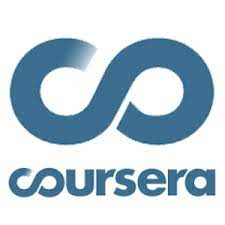</p>

<h1>Segmenting and Clustering Neighborhoods on Toronto</h1>

This script will retrieve the coordinates from the processed file (orignial source Wikipedia). 

The main requisite : 

-  we will get the latitude and the longitude coordinates of each neighborhood.

 Wikipedia : https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
 


# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

print('Libraries imported.')

Libraries imported.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  """


# Load the Data

In [2]:
df2 = pd.read_csv('postal_codes_toronto.csv')
del df2['Unnamed: 0']
#print(toronto_df.shape)
df2.head()


FileNotFoundError: ignored

# Scraping Neighboorhoo Data

In [ ]:
# loop through table, collect the each of 3 columns
# Scrape the wikipedia page of Toronto

table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
      # Create three columns named as "PostalCode","Borough" & "Neighborhood"
        cell['PostalCode'] = row.p.text[:3] # store only first three letter from the test of <p> tab.(Ex: M3A )
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        # here we replace some symbols like "(" , ")" , "/" from the neighborhood name.
        table_contents.append(cell)

df=pd.DataFrame(table_contents)
# compress some big borough name by smaller one
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [ ]:
df.shape

(103, 3)

# Data Cleasing

In [ ]:
# drop rows having null value and value assigned as "Not assigned"
df_dropna = df.dropna()
empty = 'Not assigned'
df_dropna = df_dropna[(df_dropna.PostalCode != empty ) & (df_dropna.Borough != empty) & (df_dropna.Neighborhood != empty)].reset_index(drop=True)

In [ ]:
# check for missing value
df_dropna.isnull().sum()

PostalCode      0
Borough         0
Neighborhood    0
dtype: int64

In [ ]:
#Check if we still have any Neighborhoods that are Not Assigned
df_dropna.loc[df_dropna['Borough'].isin(["Not assigned"])]

,PostalCode,Borough,Neighborhood


In [ ]:
df = df_dropna
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


# Final Processing

In [ ]:
# save this dataframe in a CSV file
df.to_csv('postal_codes_toronto.csv')

In [ ]:
# shape of dataframe
print(f'The shape of our dataframe is {df.shape} with the following details:\n- {df.shape[0]} rows\n- {df.shape[1]} columns\n- {len(df.PostalCode.unique())} unique postal codes\n- {len(df.Borough.unique())} unique boroughs')

The shape of our dataframe is (103, 3) with the following details:
- 103 rows
- 3 columns
- 103 unique postal codes
- 15 unique boroughs
